# A Linear Regression Approach for Predicting Yearly Amount Spent by Customers in an E-commerce Company.

#### The goal of this machine learning task is to develop a model that can predict the yearly amount spent by customers of a particular company. The dataset used for this task consists of customer information from an e-commerce company. It includes attributes such as email, address, avatar, average session length, time spent on the company's app and website, length of membership, and the yearly amount spent by each customer.
#### The target variable, or the variable we aim to predict, is the "Yearly Amount Spent," which represents the total amount of money a customer spends in a year. The objective is to build a linear regression model that can utilize the available features to accurately predict the target variable. Linear regression model will be trained using the dataset and its performance can be evaluated using various evaluation metrics. 

### Data Preprocessing and EDA

#### ~ Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### ~ Loading the dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Ridha15/Linear-Regression/main/Ecommerce%20Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### ~ Viewing descriptive statistics

In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### ~ Checking for missing values

In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### ~ Detecting and removing outliers

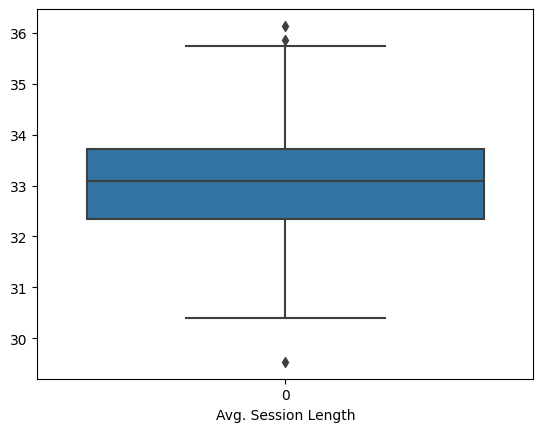

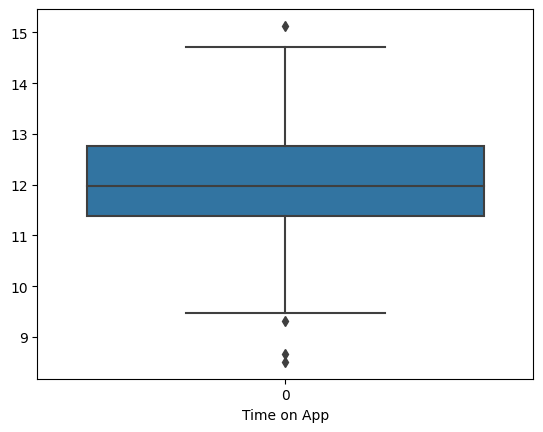

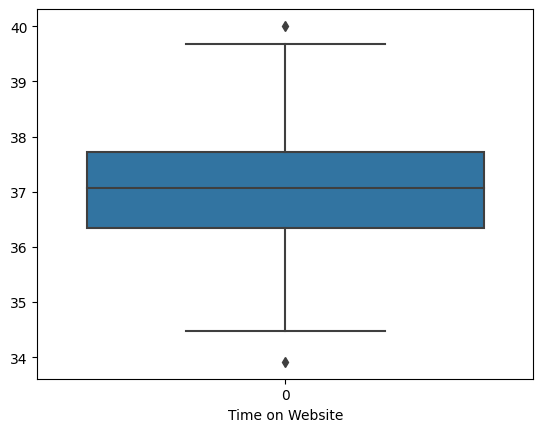

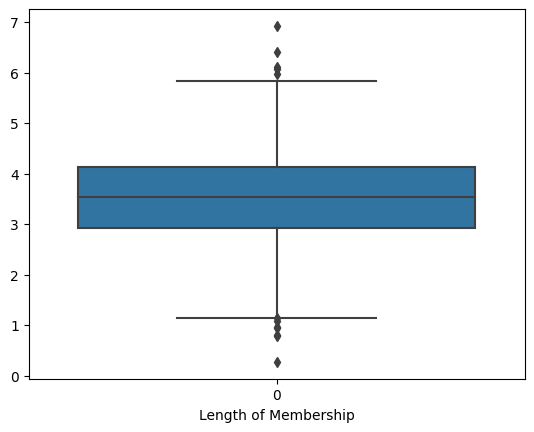

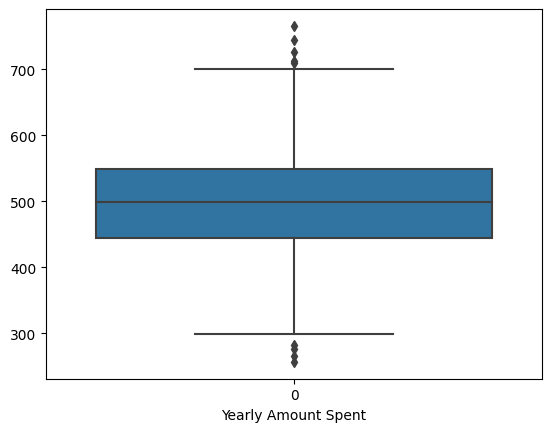

In [9]:
#boxplots to check for outliers
for col in df.select_dtypes(include=['int', 'float']):
    sns.boxplot(df[col]) 
    plt.xlabel(col)
    plt.show()

In [10]:
def remove_outliers(df):
    for col in df.select_dtypes(include=['int', 'float']):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df= remove_outliers(df)

#### ~ Checking the distribution of columns

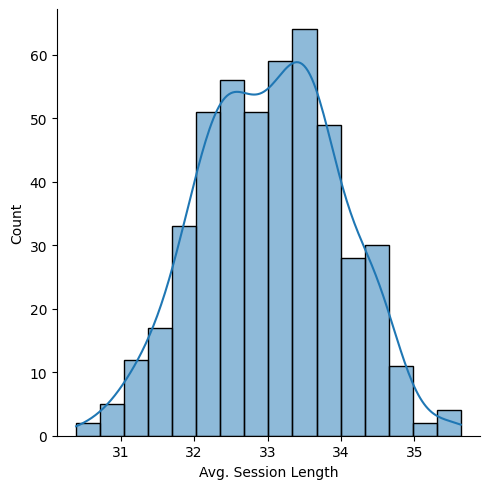

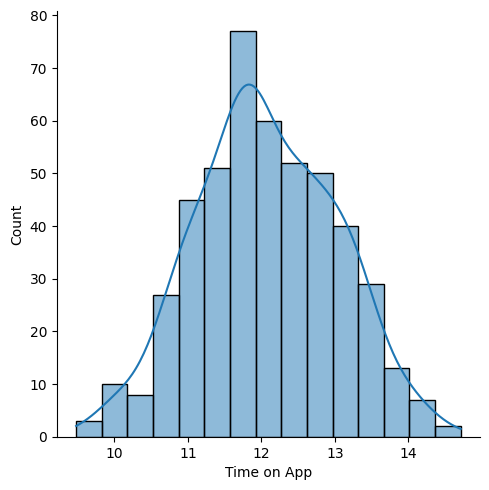

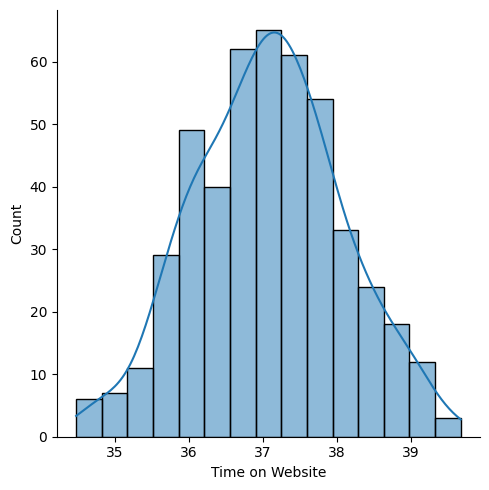

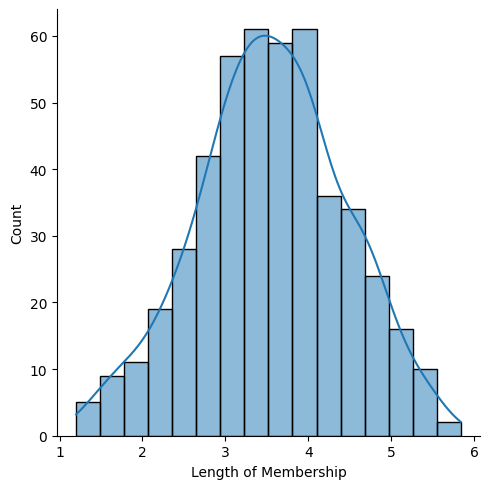

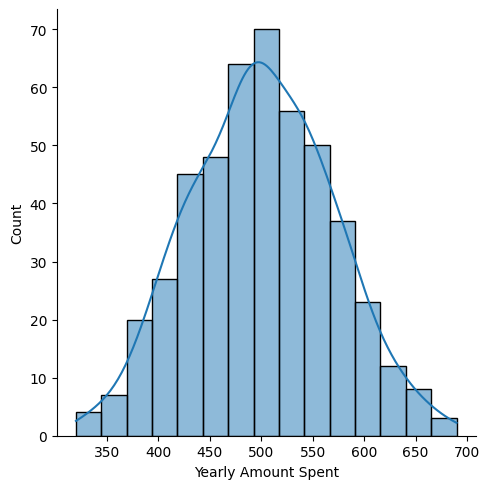

In [11]:
for col in df.select_dtypes(include=['int', 'float']):
    sns.displot(df[col], kde=True)  
    plt.show()

#### ~ Correlation Anlalysis


In [12]:
df.corr()

C:\Users\Ridha KP\AppData\Local\Temp\ipykernel_24180\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.039729,-0.007856,0.000236,0.331589
Time on App,-0.039729,1.000000,0.065066,-0.055699,0.480231
Time on Website,-0.007856,0.065066,1.000000,-0.053180,-0.005199
Length of Membership,0.000236,-0.055699,-0.053180,1.000000,0.761956
Yearly Amount Spent,0.331589,0.480231,-0.005199,0.761956,1.000000


C:\Users\Ridha KP\AppData\Local\Temp\ipykernel_24180\574720563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


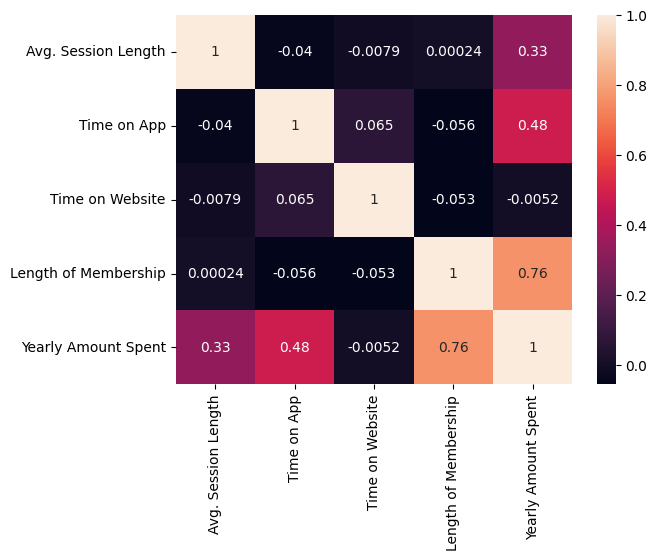

In [13]:
sns.heatmap(df.corr(), annot=True)  
plt.show()

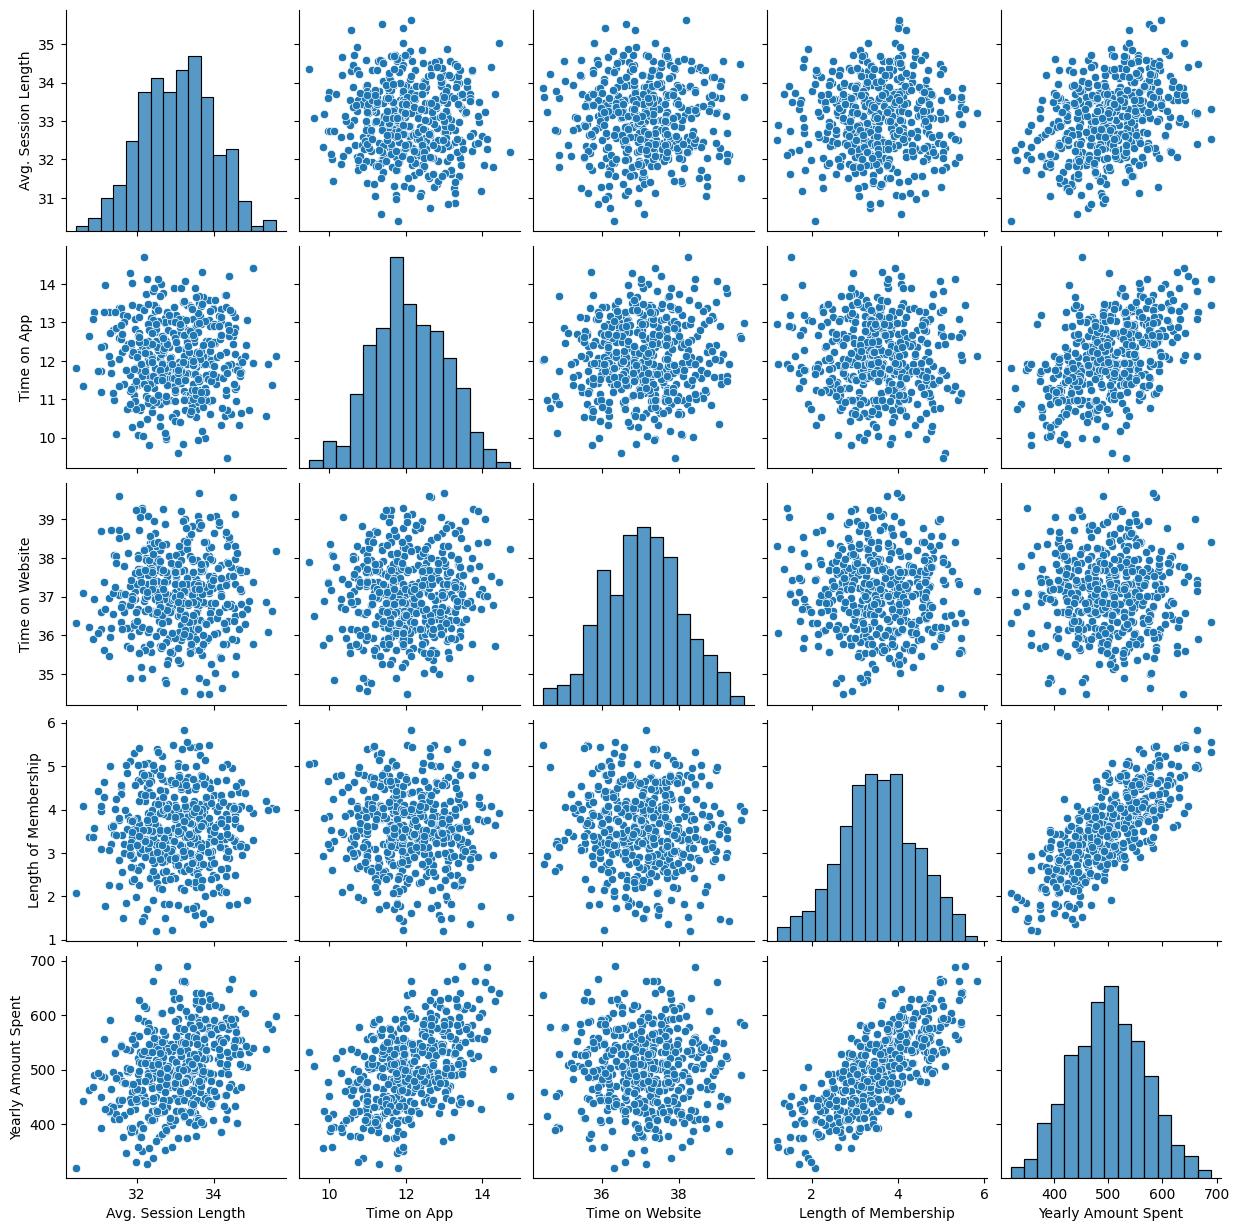

In [14]:
sns.pairplot(data=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']])
plt.show()

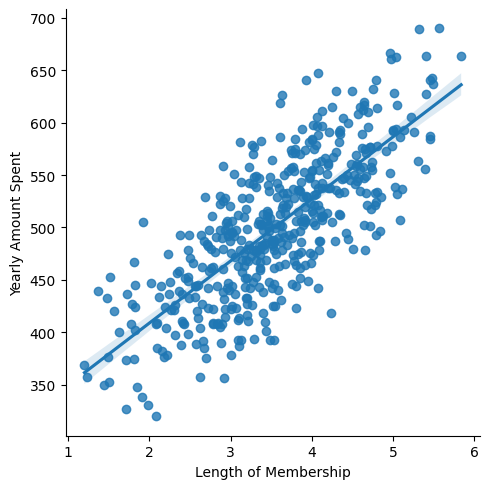

In [15]:
#most influencing factor is Length of Membership.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

#### -The length of membership has a strong positive correlation (0.76) with the yearly amount spent. As the length of membership increases, there is a significant tendency for the yearly amount spent to increase.
#### -There is a positive correlation of 0.48 between the time spent on the app and the yearly amount spent. This indicates that as the time spent on the app increases, there is a tendency for the yearly amount spent to increase as well. 
#### -There is a positive correlation of 0.33 between the average session length and the yearly amount spent. This suggests that as the average session length increases, there is a tendency for the yearly amount spent to increase as well.
### From these insights, we can conclude that the length of membership, time spent on the app,time spent on website and average session length are important factors influencing the yearly amount spent. So we will drop other columns for building the model.

### ML-based Methodology

#### ~ Model Building

In [16]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

#### ~Splitting the data spliting the data set into 70% training data and 30% test data

In [17]:
X= df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y= df["Yearly Amount Spent"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### ~Training the model using the training data

In [18]:
lr_model.fit(X_train,y_train)

LinearRegression()

#### ~ Making the predictions on test data for the model evaluation

In [19]:
predictions=lr_model.predict(X_test)

#### ~ Calculating the coefficients of the linear regression model

In [20]:
coeffecients = pd.DataFrame(lr_model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.851125
Time on App,38.961175
Time on Website,0.398541
Length of Membership,61.233052


#### ~ Evaluating the performance of the model 

Text(0, 0.5, 'Actual Amount')

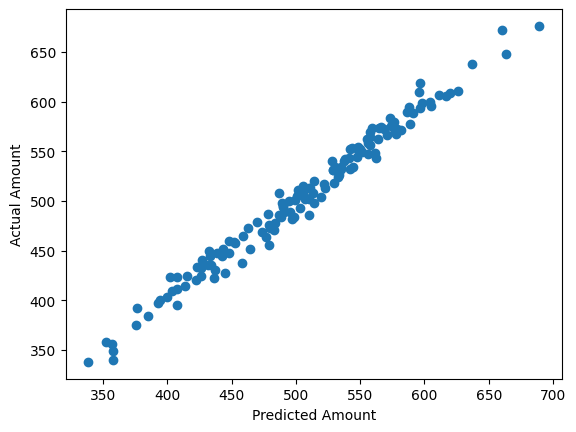

In [21]:
#comparing the predicted amounts with the actual amounts using scatter plot
plt.scatter(y_test,predictions)
plt.xlabel('Predicted Amount')
plt.ylabel('Actual Amount')

In [22]:
#calculating several evaluation metrics to assess the performance of your regression model.
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Average Prediction:",np.mean(predictions))
print("R2 Score:", metrics.r2_score(y_test,predictions))

MAE: 7.75948701879056
RMSE: 9.50257500240902
Average Prediction: 505.35802656821005
R2 Score: 0.9821574340439576


### In summary, the model performs well with relatively low MAE and RMSE values, indicating accurate predictions. RMSE value is approximately 1% avegage of predicted amounts which suggests that the model's prediction error is relatively small. Moreover, the high R-squared value (98%) indicates that the model explains a significant amount of the variance in the target variable, suggesting its effectiveness in predicting the yearly amount spent.